In [3]:
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
import numpy as np
from matplotlib.colors import ListedColormap
import seaborn as sns
#get_ipython().run_line_magic('matplotlib', 'inline')

In [4]:
def onn(X,y,
        u):
    """Classifies by the nearest training object

    Keyword arguments:
    X -- training sample
    y -- classes of training samples
    u -- object to classify
    """
    return y[np.argmin([(x[0]-u[0])**2 + (x[1]-u[1])**2 for x in X])]

In [5]:
iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target

In [6]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = np.array([onn(X,y,u) for u in  np.c_[xx.ravel(), yy.ravel()]])
Z = Z.reshape(xx.shape)

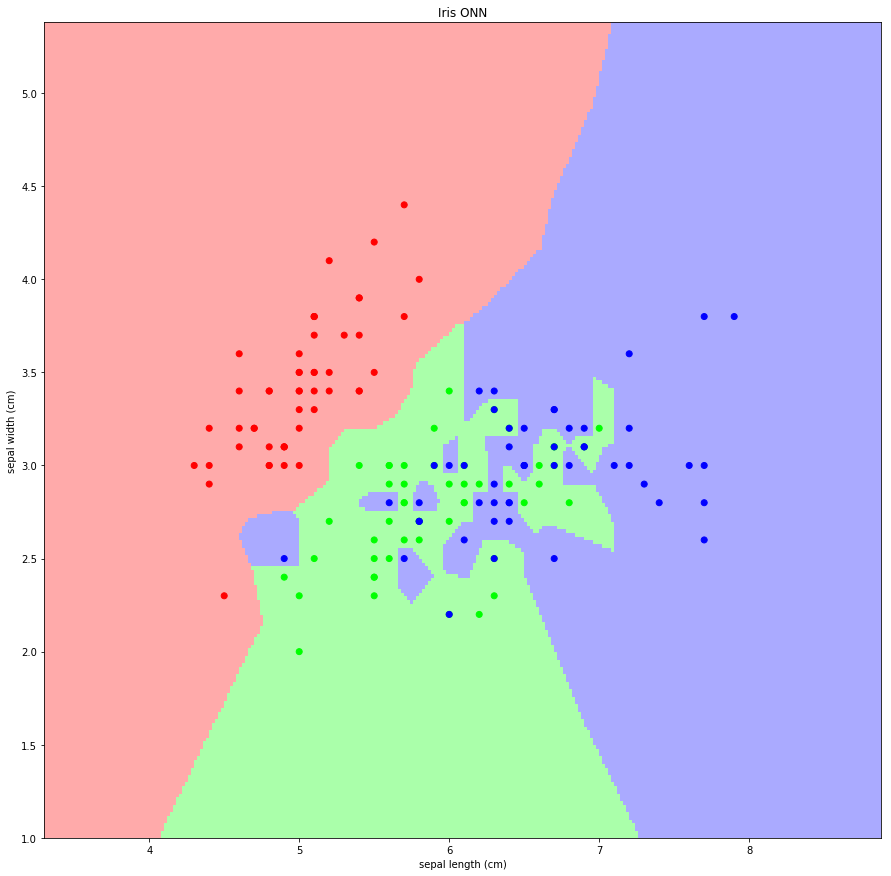

In [10]:
plt.figure(figsize=(15,15))
plt.pcolormesh(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
plt.scatter(X[:,0],X[:,1], c=y, cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Iris ONN")
plt.show()